In [10]:
#reading file
import pandas as pd
path = 'C:\\Users\Hassaan\jsrt_metadata.csv'
df = pd.read_csv(path)
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [51]:
#replacing missing values
import numpy as np
df['subtlety'].replace(np.nan,df['subtlety'].astype('float').mean() , inplace=True)
df['size'].replace(np.nan,df['size'].astype('float').mean() , inplace=True)
df['x'].replace(np.nan,df['x'].astype('float').mean() , inplace=True)
df['y'].replace(np.nan,df['y'].astype('float').mean() , inplace=True)
df['position'].replace(np.nan,df['position'].value_counts().idxmax() , inplace=True)
df['diagnosis'].replace(np.nan,df['diagnosis'].value_counts().idxmax() , inplace=True)
df['state'].replace('non-nodule',df['state'].value_counts().idxmax() , inplace=True)
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.00000,15.000000,53,Male,1634.000000,692.000000,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.00000,30.000000,78,Female,1614.000000,1090.000000,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.00000,30.000000,63,Female,1303.000000,447.000000,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.00000,14.000000,68,Female,606.000000,836.000000,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.00000,35.000000,73,Female,1438.000000,692.000000,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,2.88961,17.246753,50,Male,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
243,JPCNN090.png,2.88961,17.246753,68,Female,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
244,JPCNN091.png,2.88961,17.246753,81,Male,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer
245,JPCNN092.png,2.88961,17.246753,70,Female,937.324675,868.623377,malignant,r.upper lobe(S2),lung cancer


lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

(array([167.,  33.,  13.,   5.,   8.,   7.,   3.,   3.,   4.,   4.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

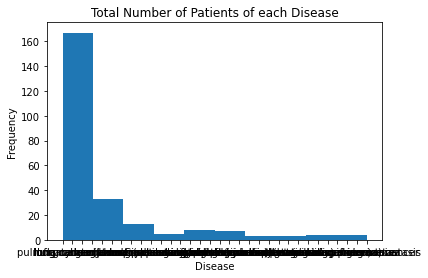

In [53]:
#QUESTION 1
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
print(df['diagnosis'].value_counts())
plt.pyplot.title('Total Number of Patients of each Disease')
plt.pyplot.ylabel('Frequency')
plt.pyplot.xlabel('Disease')
plt.pyplot.hist(df['diagnosis'])

Text(0.5, 1.0, 'MALIGNANT:')

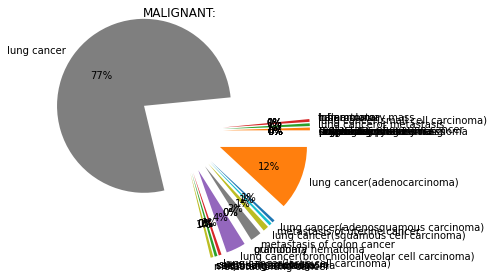

In [83]:
#QUESTION 2
lst=df['diagnosis']
lst=list(set(lst))
exp=[0]*len(lst)
maligList=[0]*len(lst)
benList=[0]*len(lst)
lstitr=0
occ=0
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['state'][itr]=='malignant':
                occ+=1
        itr+=1  
    maligList[lstitr]=occ
    exp[lstitr]=.5
    lstitr+=1
    occ=0
plt.pyplot.pie(maligList,labels=lst,autopct='%1.0f%%',explode=exp)
plt.pyplot.title('MALIGNANT:')

Text(0.5, 1.0, 'BELIGN:')

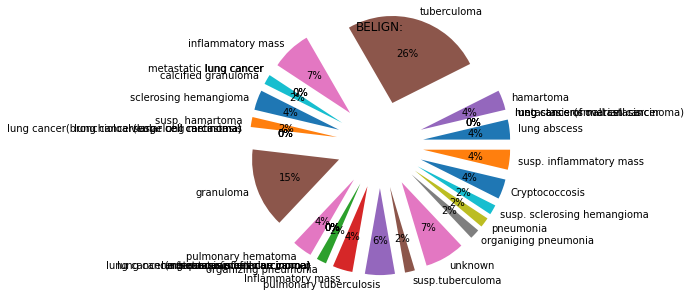

In [84]:
#QUESTION 2
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['state'][itr]=='benign':
                occ+=1
        itr+=1  
    benList[lstitr]=occ
    lstitr+=1
    occ=0
plt.pyplot.pie(benList,labels=lst,autopct='%1.0f%%',explode=exp)
plt.pyplot.title('BELIGN:')

Text(0.5, 1.0, 'MALE:')

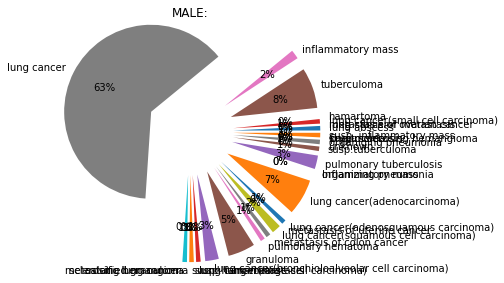

In [88]:
#QUESTION 3
Mlist=[0]*len(lst)
Flist=[0]*len(lst)
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['gender'][itr]=='Male':
                occ+=1
        itr+=1  
    Mlist[lstitr]=occ
    lstitr+=1
    occ=0

plt.pyplot.pie(Mlist,labels=lst,autopct='%1.0f%%',explode=exp)
plt.pyplot.title('MALE:')

Text(0.5, 1.0, 'FEMALE:')

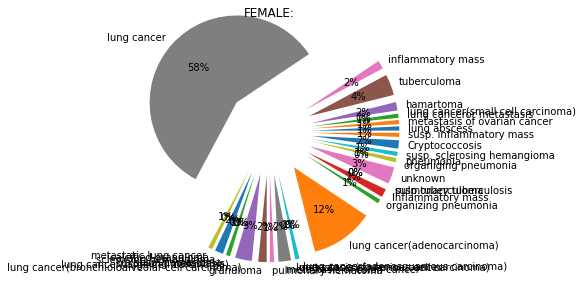

In [90]:
lstitr=0   
for i in lst:
    itr=0
    for u in df['diagnosis']:
        if i==u:
            if df['gender'][itr]=='Female':
                occ+=1
        itr+=1  
    Flist[lstitr]=occ
    lstitr+=1
    occ=0

plt.pyplot.pie(Flist,labels=lst,autopct='%1.0f%%',explode=exp)
plt.pyplot.title('FEMALE:')